In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import pylab
import quandl
import seaborn as sns
import pandas as pd
from lab import calc_ts_pairwise_correlation
import matplotlib.pyplot as plt
plt.switch_backend('agg')
token='QWe8iSbyAFzRuod2aroM'
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [ ]:
col=['USA', u'Global',  u'Global Ex USA', u'Europe', u'North America', u'Pacific']

data=pd.read_excel('BettingAgainstBeta.xlsx', header=18,index_col=0,parse_dates=[0])[col].dropna(how='all')

In [ ]:
ls *.py

In [ ]:
import mail

In [4]:
x=data.corr()

In [3]:
mkts={'SP 500':'CHRIS/CME_SP1',
	  'Natural Gas':'CHRIS/CME_NG1',
      'US 10Y':'CHRIS/CME_TY1',
      'Crude Oil':'CHRIS/CME_CL1',
      'Eurostoxx 50':'CHRIS/EUREX_FESX1',
      'Dollar Index':'CHRIS/ICE_DX1',
      'Wheat':'CHRIS/CME_W7',
      'Corn':'CHRIS/CME_C1',
      'Dax':'CHRIS/EUREX_FDAX1',
      'FTSE100':'CHRIS/LIFFE_Z1',
      'Eurodollar':'CHRIS/CME_ED1',
      'Euro':'CHRIS/CME_EC1',
      'GBP':'CHRIS/CME_BP1',
      'Gold':'CHRIS/CME_EC1'

      }
data_index=pd.DataFrame()
for m in mkts.keys():
    try:
        data_index[m]=quandl.get(mkts[m],authtoken=token).Last
    except:
        data_index[m]=quandl.get(mkts[m],authtoken=token).Settle
data_pct=data_index.pct_change()


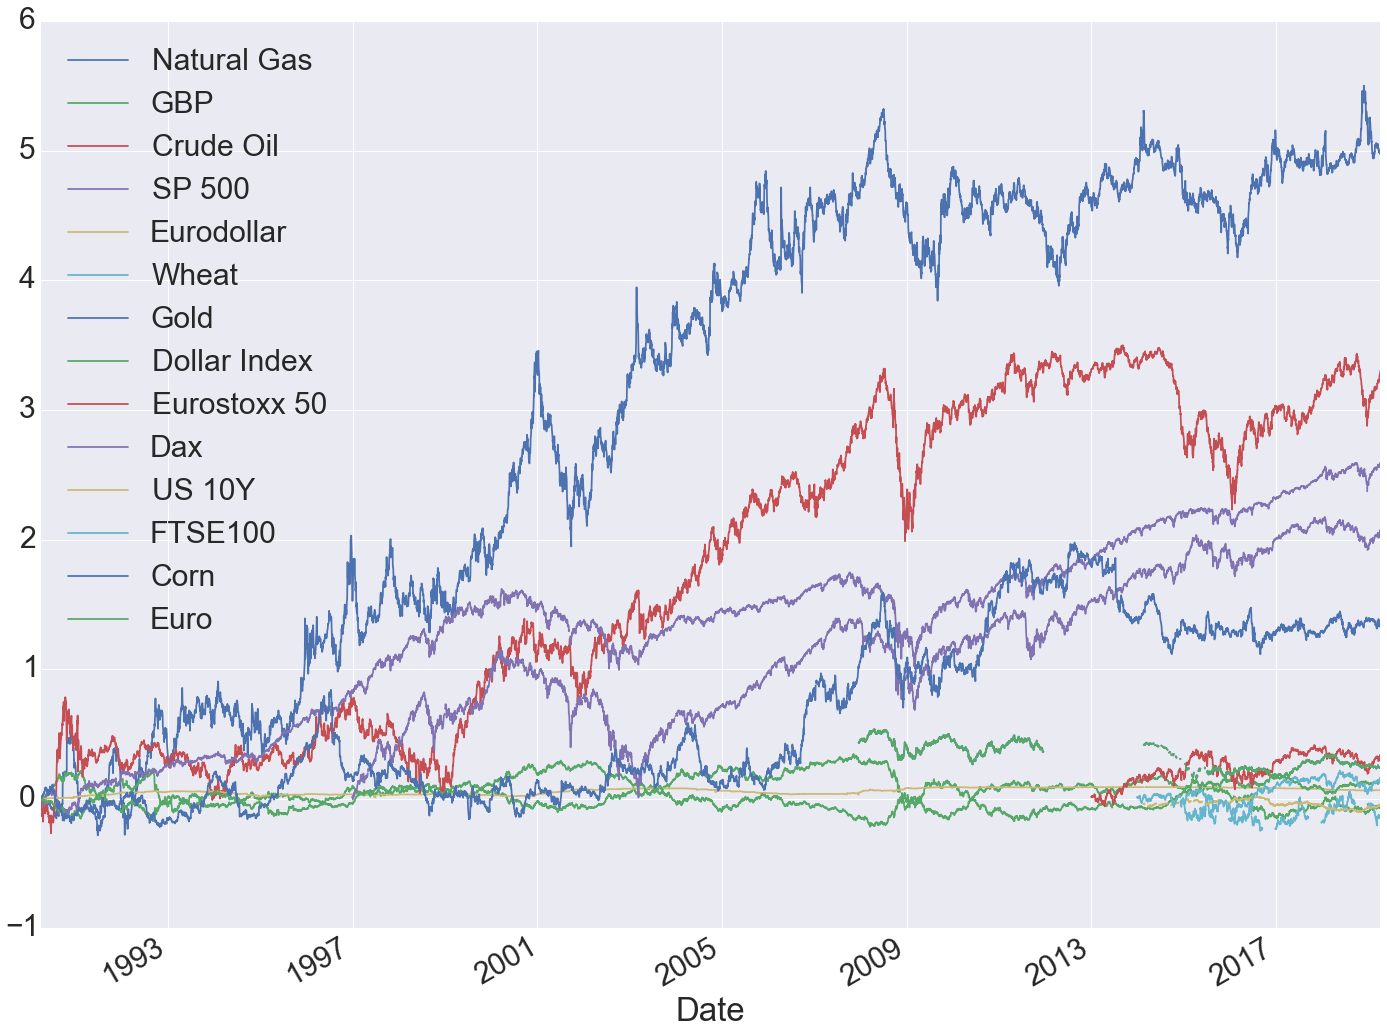

In [5]:
data_pct.cumsum().plot()

In [6]:
def calc_pairwise_correlation(corr_matrix):
    n=corr_matrix.count().count()
    return (corr_matrix.abs().sum()-1).sum()/(n*(n-1))

# Calculate timeseries of pairwise correlation using days look back accros as many numbers as needed
def calc_ts_pairwise_correlation(data_pct,days=250):
	corrts=pd.ewmcorr(data_pct,days,min_periods=days)
	s = pd.Series()
	for i in data_pct.index:
		x=corrts.ix[i]
		x=x[x.count()!=0].T[x.count()!=0]
		s[i]=calc_pairwise_correlation(x)
	return s


/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.ewm_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=250,adjust=True,com=250).corr(other=<DataFrame>,pairwise=True)
  import sys
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


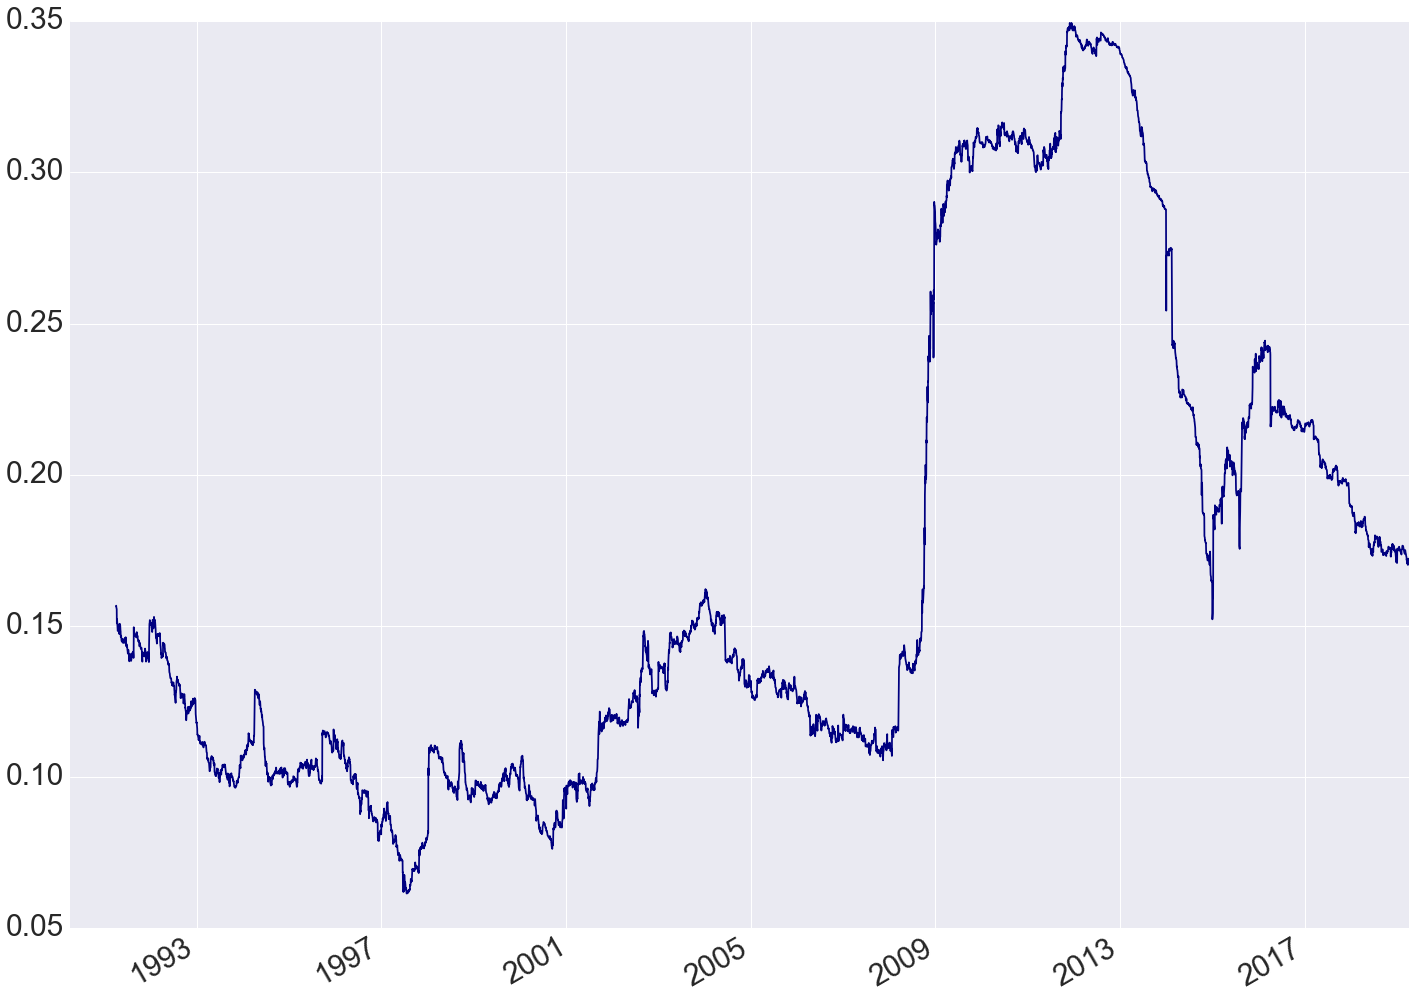

In [7]:
calc_ts_pairwise_correlation(data_pct).plot(colormap='jet')

In [8]:
s=calc_ts_pairwise_correlation(data_pct)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.ewm_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=250,adjust=True,com=250).corr(other=<DataFrame>,pairwise=True)
  import sys
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
pwd

u'/Users/mrefermat/git/aws_fin_data'

In [12]:
s.dropna().to_csv('pairwise_c.csv')

In [37]:
corrts.ix['1989-04-27 00:00:00']

,USA,Global,Global Ex USA,Europe,North America,Pacific
USA,1.000000,0.453956,0.136086,0.280734,0.996248,0.068814
Global,0.453956,1.000000,0.944493,0.379512,0.450148,0.893673
Global Ex USA,0.136086,0.944493,1.000000,0.317608,0.133257,0.968525
Europe,0.280734,0.379512,0.317608,1.000000,0.282569,0.073764
North America,0.996248,0.450148,0.133257,0.282569,1.000000,0.062488
Pacific,0.068814,0.893673,0.968525,0.073764,0.062488,1.000000


In [48]:
corrts=pd.ewmcorr(data.dropna(),250,min_periods=250)
s = pd.Series()
for i in data.dropna().index:
    s[i]=calc_pairwise_correlation(corrts.ix[i])

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=250,adjust=True,com=250).corr(other=<DataFrame>,pairwise=True)
  
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [51]:
s.head()

1989-02-01   -0.2
1989-02-02   -0.2
1989-02-03   -0.2
1989-02-06   -0.2
1989-02-07   -0.2
dtype: float64

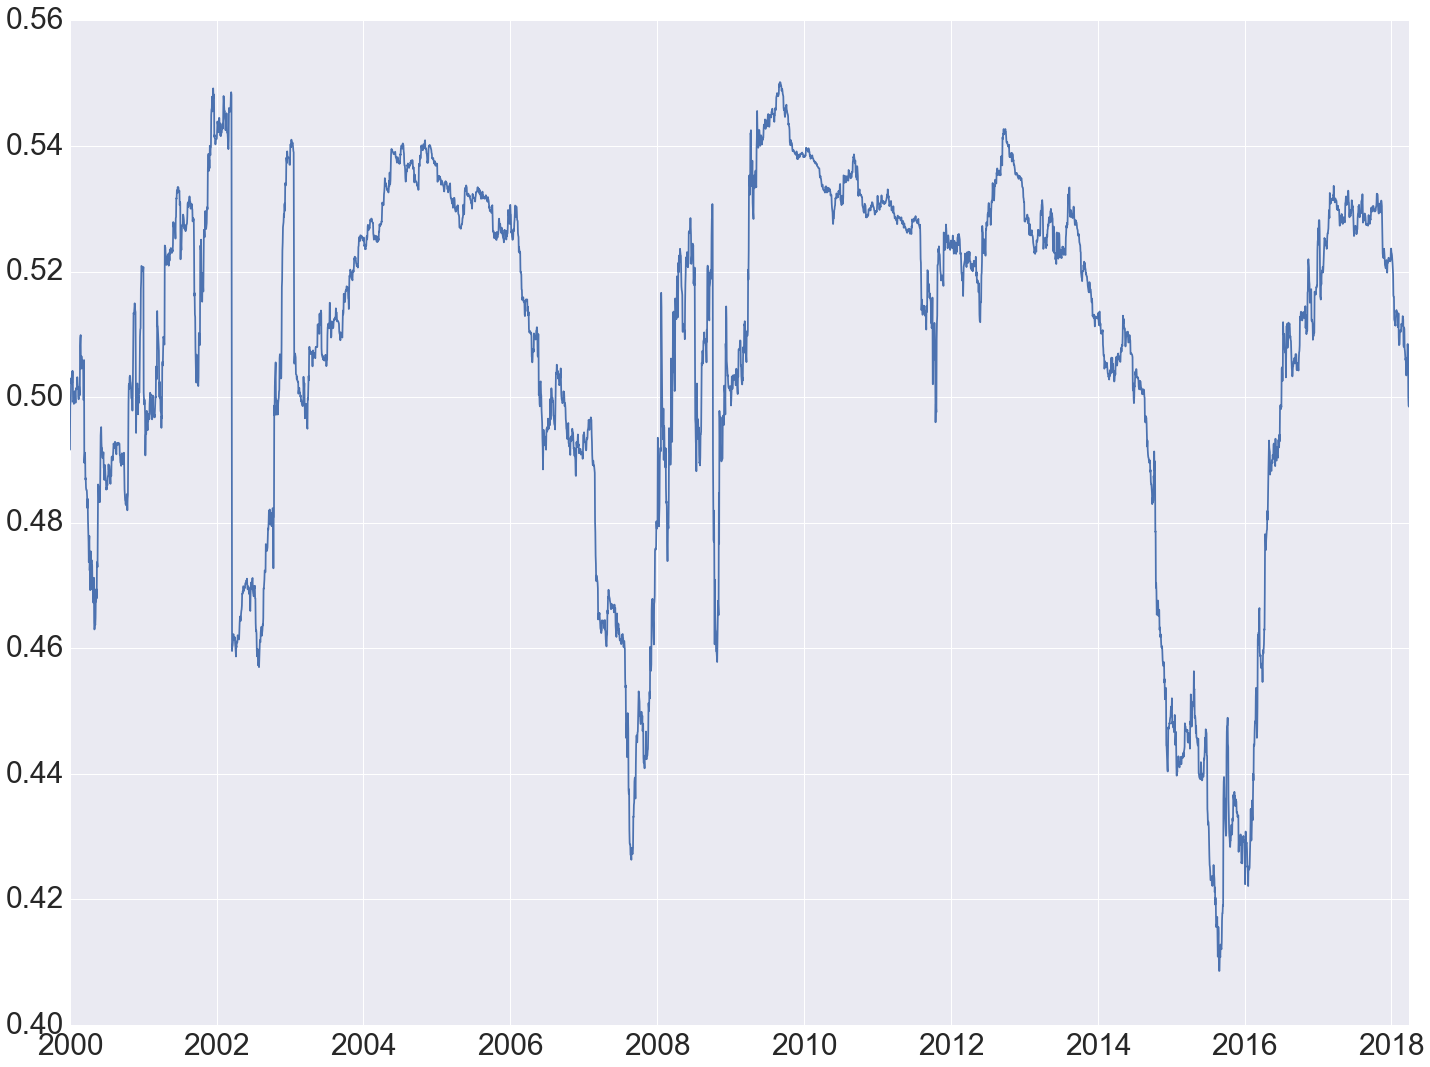

In [50]:
s['2000':].plot()

In [25]:
data.corr()

,USA,Global,Global Ex USA,Europe,North America,Pacific
USA,1.000000,0.851307,0.226172,0.268478,0.997398,0.054349
Global,0.851307,1.000000,0.659266,0.636769,0.853588,0.432247
Global Ex USA,0.226172,0.659266,1.000000,0.837618,0.235259,0.748240
Europe,0.268478,0.636769,0.837618,1.000000,0.266760,0.295426
North America,0.997398,0.853588,0.235259,0.266760,1.000000,0.055321
Pacific,0.054349,0.432247,0.748240,0.295426,0.055321,1.000000


In [ ]:
factors=['BAB Factors','MKT','SMB','HML FF','HML Devil','UMD']
col=['USA', u'Global',  u'Global Ex USA', u'Europe', u'North America', u'Pacific']
data={}
for f in factors:
    data[f]=pd.read_excel('BettingAgainstBeta.xlsx', sheet_name=f,header=18,index_col=0,parse_dates=[0])[col].dropna(how='all')